# Classification - Decision Tree

External Sources used:

http://scikit-learn.org/stable/modules/tree.html#tree

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

## For this task, Pandas and sklearn have been used

- Loading wine dataset from sklearn datasets.  
- Creating a dataframe and printing the first and last five records of the dataset.
- Printing the class names.  
- Spliting the dataset 70% for training, and 30% for testing the classifier. 
- Using gini and entropy to measure the quality of a split. 
- Calculating and printing the confusion matrix, and the classification Report (including: precision, recall, f1-score, and support).
- Printing the decision tree visualization. 

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
wine= datasets.load_wine()  # Loading wine dataset from sklearn datasets
x= wine.data
y= wine.target
df = pd.DataFrame(x, columns= wine.feature_names) #Creating a dataframe

In [2]:
# printing first five records of dataset
df.head() 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
# Printing last five records of dataset
df.tail() 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


In [4]:
# Printing the class names
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [5]:
#splitting the dataset 70% for training and 30% for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state= 42, stratify= y)

In [6]:
# To measure the quality of a split using 'gini'
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt1= DecisionTreeClassifier(criterion ='gini')
dt1.fit(x_train, y_train)
y_pr = dt1.predict(x_test) 
print(y_pr) # variable y_pr stores class prediction when used gini

[0 1 0 0 1 0 2 1 0 2 1 1 2 1 0 2 1 0 2 2 1 2 2 2 1 2 0 1 0 1 0 1 2 1 1 2 1
 1 1 0 2 0 0 0 0 1 1 0 2 0 1 1 2 0]


In [7]:
# Mean accuracy for criterion= 'gini' on true labels
print(dt1.score(x_test, y_test)) # Mean accuracy on given test data and labels

0.9629629629629629


In [100]:
# To Measure the quality of split using entropy
dt2 = DecisionTreeClassifier(criterion ='entropy')
dt2.fit(x_train, y_train)
y_pr2 = dt2.predict(x_test)
print(y_pr2)  # variable y_pr2 stores class prediction when used entropy

[0 1 0 0 0 0 2 1 1 2 2 1 2 1 0 2 1 1 2 2 1 2 2 1 1 2 0 0 0 1 1 1 2 1 1 2 1
 1 1 0 2 0 0 0 0 1 1 0 2 0 1 1 2 0]


In [101]:
# Mean accuracy for criterion= 'entropy' on true labels
print(dt2.score(x_test, y_test)) # Mean accuracy on given test data and labels

0.9074074074074074


In [77]:
#Printing the confusion matrix for gini
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pr))

[[17  1  0]
 [ 1 20  0]
 [ 0  0 15]]


In [79]:
# Printing the confusion matrix for entropy
print(confusion_matrix(y_test, y_pr2)) 

[[16  2  0]
 [ 1 19  1]
 [ 0  1 14]]


In [81]:
# Printing the classification report for gini
from sklearn.metrics import classification_report
t= wine.target_names
print(classification_report(y_test, y_pr, target_names = t))

             precision    recall  f1-score   support

    class_0       0.94      0.94      0.94        18
    class_1       0.95      0.95      0.95        21
    class_2       1.00      1.00      1.00        15

avg / total       0.96      0.96      0.96        54



In [82]:
# Printing classification report for entropy
print(classification_report(y_test, y_pr2, target_names = t))

             precision    recall  f1-score   support

    class_0       0.94      0.89      0.91        18
    class_1       0.86      0.90      0.88        21
    class_2       0.93      0.93      0.93        15

avg / total       0.91      0.91      0.91        54



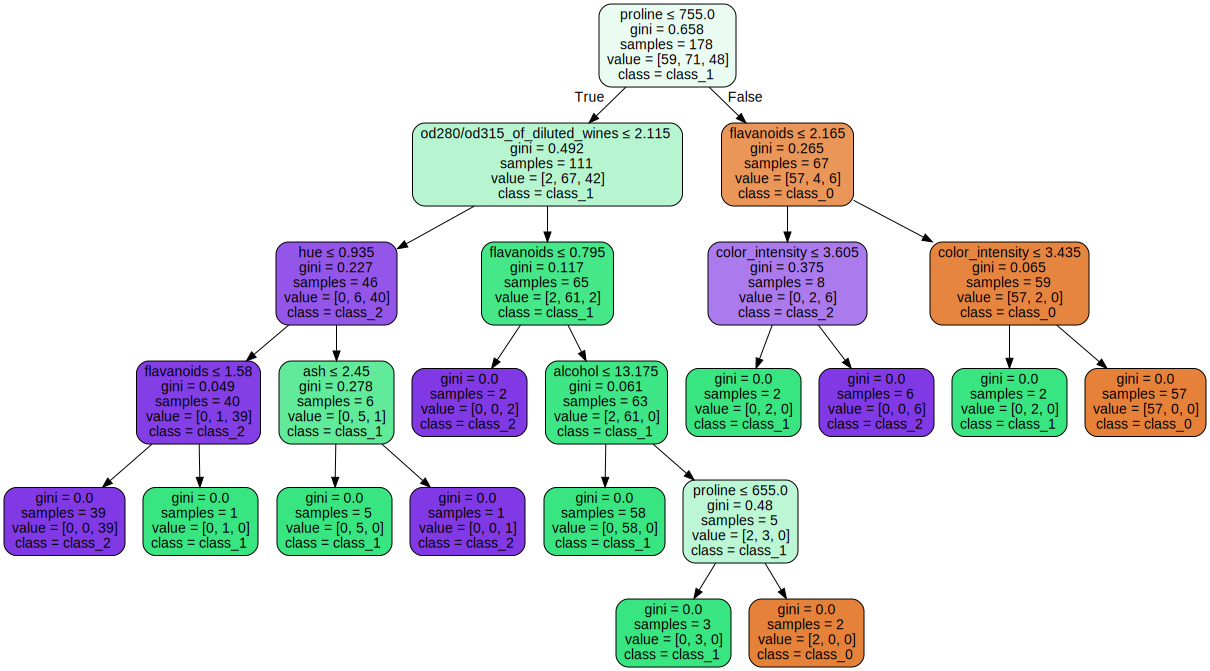

In [90]:
# Printing the decision tree visualization for gini
# Importing tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion= 'gini')
clf = clf.fit(x,y)
# Importing graphviz and export_graphviz
import graphviz 
from sklearn.tree import export_graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("wine") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=wine.feature_names,  
                         class_names=wine.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

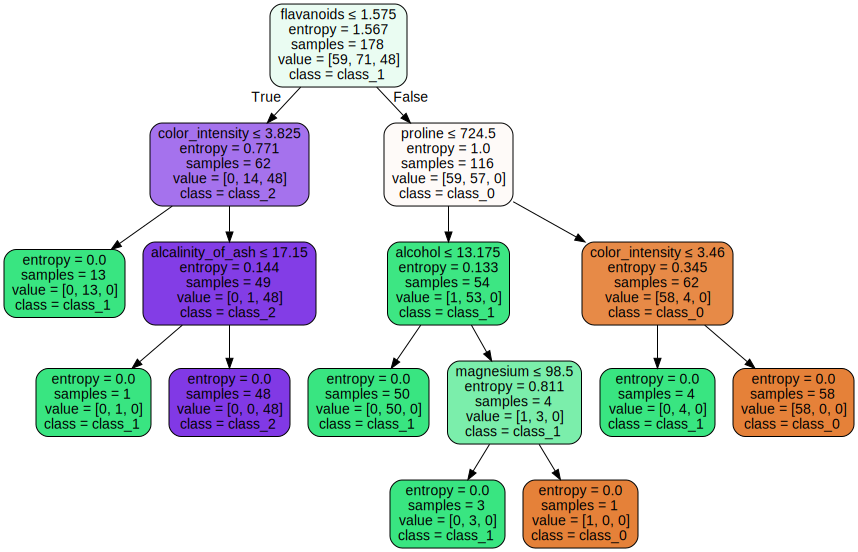

In [91]:
#Printing the decision tree visualization for entropy
# Importing tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion= 'entropy')
clf = clf.fit(x,y)
# Importing graphviz and export_graphviz
import graphviz 
from sklearn.tree import export_graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("wine") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=wine.feature_names,  
                         class_names=wine.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 